### 목표
 - 문제정의
   - 500명의 키와 몸무게, 비만도 라벨을 이용하여 비만을 판단하는 모델을 만들어보자.
   - 머신러닝 과정을 이해해보자.


In [1]:
# 판다스, 시각화
import pandas as pd
import matplotlib.pyplot as plt

# 모델 관련한 불러오는 코드(2줄)
# knn 모델 불러오기, 측정 도구 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### 데이터 준비(수집)

In [2]:
# pd.read_csv()
# data 변수에 담아주기
# Label(답 데이터) 컬럼을 인덱스로 설정해서 불러오기
data = pd.read_csv('./data/bmi_500.csv',index_col='Label')
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [3]:
# 데이터 정보 확인해보기
# 전체 행, 컬럼 정보, 결측치 여부 확인
data.info()
# shape : (500,3)
# 성별 컬럼, 키, 몸무게 모두 결측치 X
# 데이터 확인 필수 ! -> 머신러닝 모델은 문자를 이해할 수 없음
# 이번 실습에서는 Height, Weight 2개만 활용

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


### 데이터 전처리 : pass

### 데이터 분석(탐색)
 - 기술 통계 확인 : 평균, 최소, 최대, 중앙(오름차순으로 줄 세웠을 때 정중앙에 있는 값)
 - 시각화를 통해 데이터의 분포 확인해보기

In [4]:
# describe()
# int, float 컬럼들에 대해서 먼저 작용
data.describe()
# 현재 data 안에는 비만에 대한 사람의 데이터가 많이 있음을 알 수 있음


,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [5]:
# 먼저 Label 확인이 필요함
# 중복없이 Label 값 확인해보자
data.index.unique()

# 'Extreme Obesity' 고도비만
# 'Obesity' 비만
# 'Overweight' 과체중
# 'Normal' 정상체중
# 'Weak' 저체중
# 'Extremely Weak' 극심한 저체중

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [6]:
# 각각의 값의 횟수를 셀 수 있는 함수
# value_counts()
data.index.value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

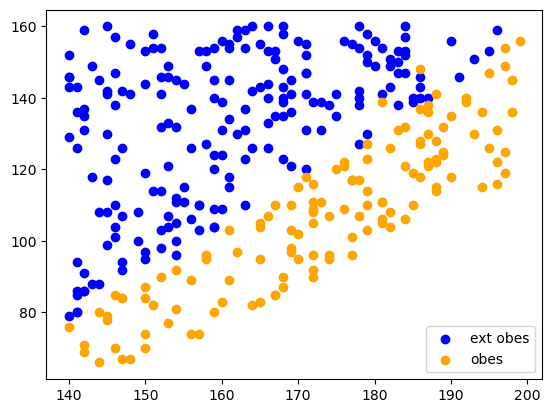

In [7]:
# 시각화 해보기 : 비만도 레이블을 표현해보기
# x축 키, y축 몸무게를 기준으로 산점도 그려보기
# Extreme Obesity에 해당하는 행만 접근하기
# loc[행인덱싱]
d = data.loc['Extreme Obesity'] #.shape 크기확인
plt.scatter(d['Height'], d['Weight'], c = 'blue', label = 'ext obes') # = d.loc[:, 'Height']

# Obesity 행만 접근해보기
# 산점도 표현해보
d2 = data.loc['Obesity'] #.shape 크기확인
plt.scatter(d2['Height'], d2['Weight'], c = 'orange', label = 'obes') # = d.loc[:, 'Height']

plt.legend()  # 범례표시
plt.show()

In [8]:
# 그래프를 그리는 함수 정의
def bmi_draw(label, color):
    d = data.loc[label] 
    plt.scatter(d['Height'], d['Weight'], c = color, label = label)

In [9]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

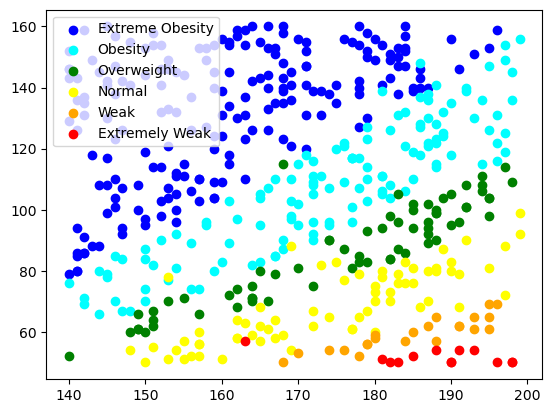

In [10]:
# Label을 하나씩 연결하면서, 색감도 설정하면서 함수를 6번 호출(사용)
bmi_draw('Extreme Obesity', 'blue')
bmi_draw('Obesity', 'cyan')
bmi_draw('Overweight', 'green')
bmi_draw('Normal', 'yellow')
bmi_draw('Weak', 'orange')
bmi_draw('Extremely Weak', 'red')
plt.legend()
plt.show()

### 모델링
 - 모델 선택 및 하이퍼 파라미터 조정(knn 모델 선택)
 - 모델 학습
 - 모델 예측 및 평가

In [11]:
# 인덱싱 설명
# numpy 2차원일 때
import numpy as np
arr = np.arange(0,10).reshape(2,5)
display(arr) # 기존의 자료구조 형태의 모양을 유지하면서 출력
# 1번째 행 접근
display(arr[1])
# 숫자 8이라는 데이터 접근
display(arr[1][3])
# 숫자 4에 접근
display(arr[0][4])
# arr[행][열] -> arr[행,열]
display(arr[0,4])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

array([5, 6, 7, 8, 9])

8

4

4

In [12]:
# 판다스에서
# loc, iloc 인덱서를 사용해야 가능
# df.loc[행,열]
# df.iloc[헹.열]

# 행 데이터 접근
# df.loc[행], df.loc[값:값] ==> df.loc[행:행]
# df.iloc[행], df.iloc[값:값] ==> df.iloc[행:행]

# 열 데이터 접근
# df.loc[:, 열], df.loc[:,열:열]
# df.iloc[:, 열인덱스], df.loc[:, 열인덱스:열인덱스]

# 행, 열 접근
# df.loc[시작행:끝행, 시작열:끝열]
# df.iloc[시작행인덱스:끝행인덱스, 시작열인덱스:끝열인덱스]

In [13]:
# 인덱스에 있는 label을 컬럼쪽으로 연결하기(이동하기) : df.reset_index()
# 컬럼명 확인 df.columns
data2 = data.reset_index() # 원본을 유지하고 싶다면 새로운 변수명으로 대입
data2
# data index가 Label로 된 상태가 그대로 유지됨(원본 유지)

,Label,Gender,Height,Weight
0,Obesity,Male,174,96
1,Normal,Male,189,87
2,Obesity,Female,185,110
3,Overweight,Female,195,104
4,Overweight,Male,149,61
...,...,...,...,...
495,Extreme Obesity,Female,150,153
496,Obesity,Female,184,121
497,Extreme Obesity,Female,141,136
498,Extreme Obesity,Male,150,95


In [14]:
# 문제, 답 (컬럼 분리)
X = data2.loc[:, 'Height':'Weight'] # 끝까지면 생략 가능
y = data2.loc[:, 'Label']

# 크기 확인
print('문제크기 : ', X.shape)
print('답크기 : ', y.shape)

문제크기 :  (500, 2)
답크기 :  (500,)


In [21]:
# 행이 총 몇 개? 500
# train, test 데이터로 분리하는 비율
# 7:3 (7.5:2.5), (8:2)
# X_train, y_train, X_test, y_test
# 500개 중에서 70%에 속하는 데이터의 개수는? ~ 350개
X_train =  X.iloc[:350]# X에서 ~350개 까지 
X_test =  X.iloc[350:]# X에서 350번째 부터 ~

y_train = y.iloc[:350] # y에서 ~350개 까지
y_test = y.iloc[350:] # y에서 350번째 부터 ~

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 2) (350,)
(150, 2) (150,)


### 모델링
 - 모델 객체 생성
 - 모델 학습
 - 모델 평가 및 예측

In [22]:
# 데이터 클래스(카테고리)의 개수는?
from sklearn.neighbors import KNeighborsClassifier
# 여섯 개 중에 한 개를 판단하는 것 -> 분류
from sklearn.metrics import accuracy_score # 정확도 지표

In [23]:
# knn_model 이라는 변수로 모델 객체 생성
# 사람이 설정하는 매개변수 => 하이퍼 파라미터
# 이웃의 수 n_neighbors : 5개 
knn_model = KNeighborsClassifier(n_neighbors=5)

In [24]:
# 모델 학습
# fit(훈련문제, 훈련답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# 예측 시켜보기
# predict(테스트 문제)
pre = knn_model.predict(X_test)
# pre.size #

150

In [28]:
# test 평가
# 정확도 지표
accuracy_score(y_test, pre) # *100 --> 91%

0.9066666666666666